In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
x=torch.unsqueeze(torch.linspace(-1,1,100),dim=1)#torch只能處理二維以上的數據
y=x.pow(2)+0.2*torch.rand(x.size())

x,y=Variable(x),Variable(y)

In [3]:
class Net(torch.nn.Module):
    def __init__(self,n_features,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden=torch.nn.Linear(n_features,n_hidden)
        self.predict=torch.nn.Linear(n_hidden,n_output)
        
    def forward(self,x):
        x=F.relu(self.hidden(x))
        x=self.predict(x)
        return x

In [4]:
net=Net(1,10,1)

In [5]:
optimizer=torch.optim.SGD(net.parameters(),lr=0.2)
loss_fun=torch.nn.MSELoss()

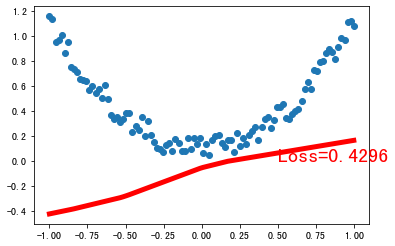

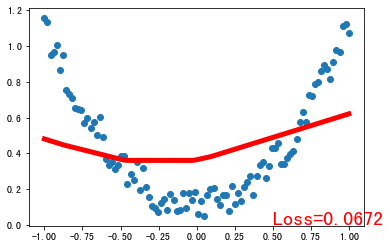

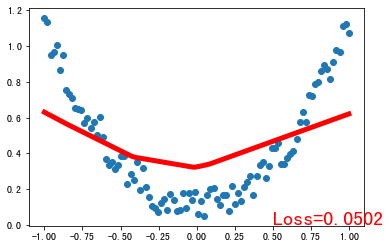

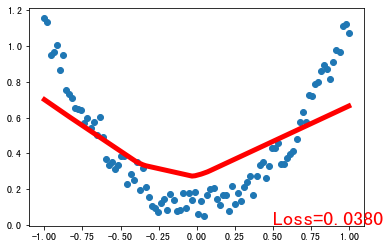

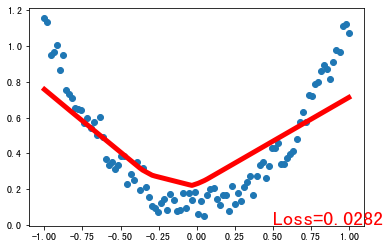

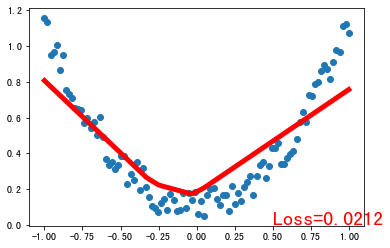

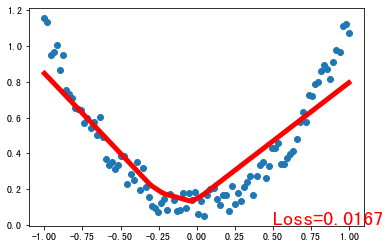

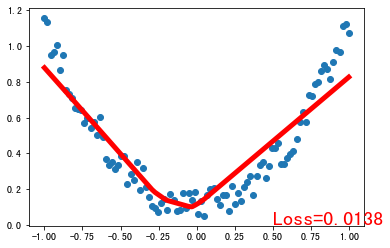

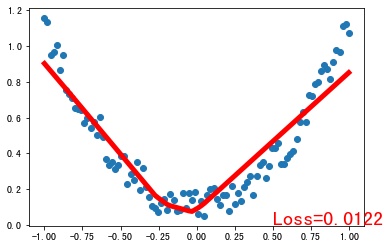

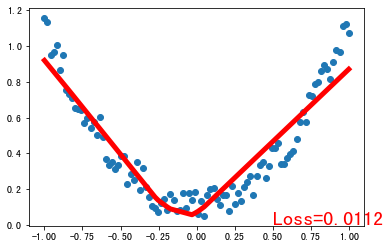

In [6]:
for i in range(100):
    prediction=net(x)
    
    loss=loss_fun(prediction,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 10 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)

plt.ioff()